In [ ]:
!pip install tensorflow numpy matplotlib

did not find executable at 'C:\Users\STANE\AppData\Local\Programs\Python\Python313\python.exe': The system cannot find the file specified.




In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras import layers

# the usual suspects
import numpy as np
import matplotlib.pyplot as plt

 ran the next cell that loaded the Fashion MNIST data and displayed the first 12 images

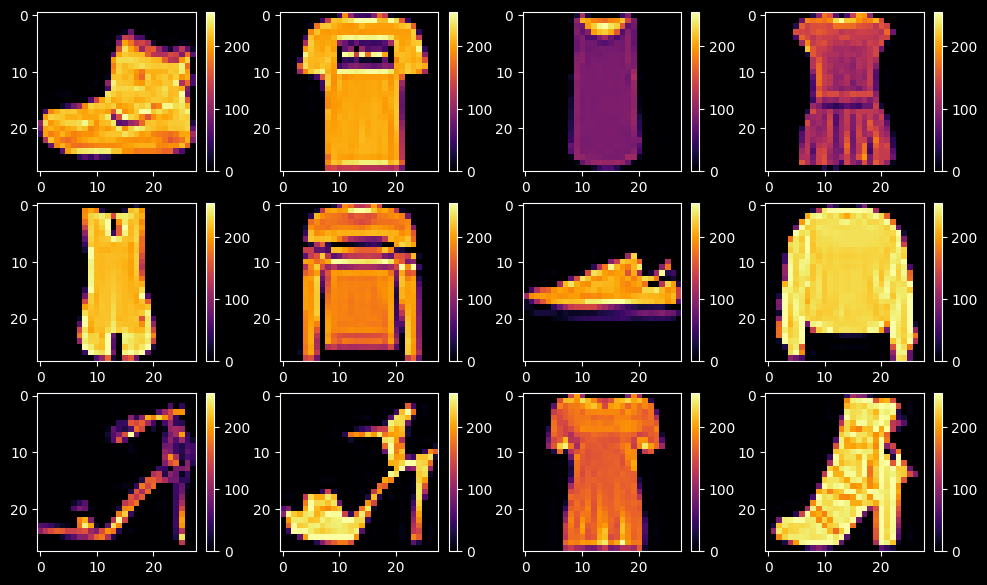

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

plt.figure(figsize=(12,7)) #create new figure object and set its size
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    plt.imshow(train_images[i],cmap='inferno') #colormap inferno: black to red to y
    plt.colorbar()
plt.show()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploring the Data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
#how many images
print('number of images:', len(train_images))

#of what type is the 1st image (i.e. all images)
print('type:', type(train_images[0]))

#of what shape is the 1st image (i.e. all images)
print('shape:', train_images[0].shape)

#what are minimum and maximum values in the entire train_images
print('image value range:', (np.min(train_images), np.max(train_images)))

number of images: 60000
type: <class 'numpy.ndarray'>
shape: (28, 28)
image value range: (np.uint8(0), np.uint8(255))


Also, there are 60,000 labels in the training set:

In [6]:
print('number of labels:', len(train_labels))


# code to check the type of labels or a single label
print('type of labels array:', type(train_labels))
print('type of a single label:', type(train_labels[0]))


print('shape:', train_labels.shape)
print('set of label values:', set(train_labels))

number of labels: 60000
type of labels array: <class 'numpy.ndarray'>
type of a single label: <class 'numpy.uint8'>
shape: (60000,)
set of label values: {np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


Similarly to training data, there are 10,000 images and labels in the test set. Again, each test image is represented as 28 x 28 pixels, and each test label has value 0-9.

In [7]:
print('test_images shape:', test_images.shape)
print('image value range:', (np.min(test_images), np.max(test_images)))

print('\ntest_labels shape:', test_labels.shape) # \n is for new line
print('set of label values', set(test_labels))

test_images shape: (10000, 28, 28)
image value range: (np.uint8(0), np.uint8(255))

test_labels shape: (10000,)
set of label values {np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


## Preprocessing the Data

The data must be preprocessed before training the network. We saw the range of pixel values goes from 0 to 255.

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

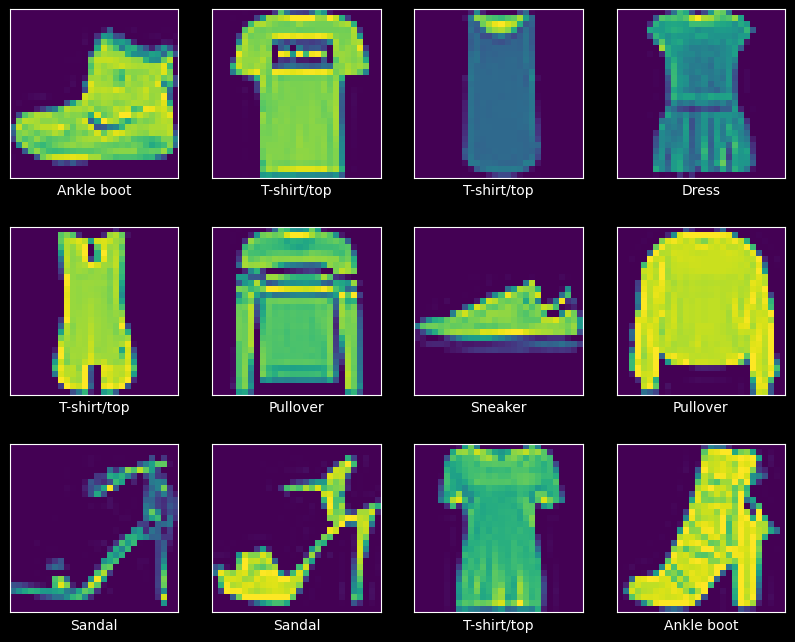

In [9]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xticks([]); plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='viridis') #colormap viridis: darkblue to gree
    plt.xlabel(class_names[train_labels[i]])
plt.show()

We could also use a grey scale (binary; or binary in reverse order):

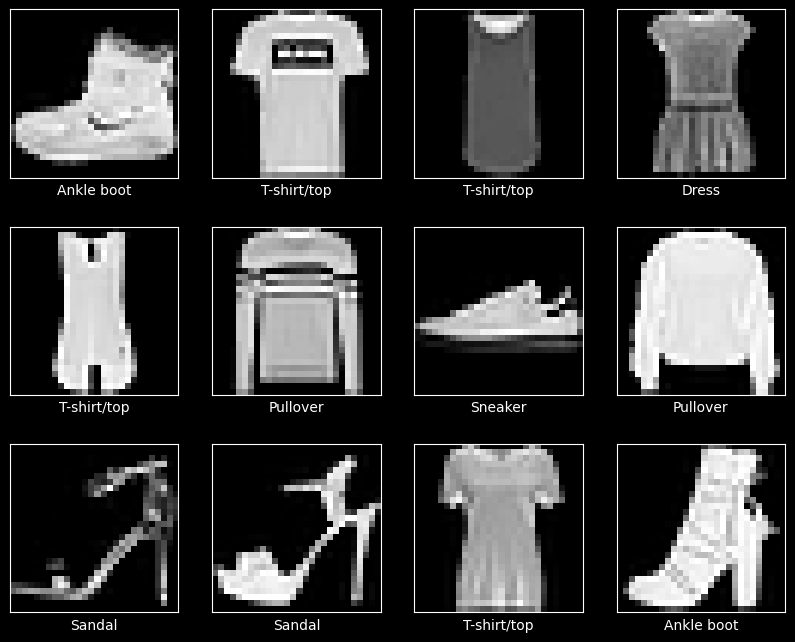

In [10]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xticks([]); plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary_r) #colormap: binary reversed
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building the Model

Building a neural network requires configuring the layers of the model and then compiling the model. Before that, we set the numpy and tensorflow seeds so that when re-runing the cell we start with the same initial values of all the parameters to be learned/estimated (this gives us reproducibility of the same results).

In [15]:
# Set seeds (using the values from your image)
np.random.seed(123) #set the seed in numpy
tf.random.set_seed(1234) #set the seed in tensorflow

# #building the architecture of the model
mynet = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28), name='input_layer'), #reshaping image to ve
    layers.Dense(units=128, activation='relu', name='hidden1'),
    layers.Dense(units=10, activation='softmax', name='output_layer')
], name='mynet1') #name is used in printout (can be different from 'mynet')

# #compiling the model
mynet.compile(optimizer='rmsprop', #root mean square propagation optimizer
              loss='sparse_categorical_crossentropy', #measures model performance/a
              metrics=['accuracy'])

mynet.summary()

Model: "mynet1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Training/Fitting the Model

For fitting the model, we use `fit` method of our object `mynet`.

In [20]:
#fit the mynet model
mynet.fit(x=train_images, y=train_labels, epochs=5, batch_size=256)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9222 - loss: 0.2137
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9239 - loss: 0.2087
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9255 - loss: 0.2044
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9273 - loss: 0.2004
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9296 - loss: 0.1964


**IMPORTANT!** If you rerun the `mynet.fit()` function, the initial values of the parameters will be different, resulting in the rerun having different output (i.e. different estimated/learned values of the network parameters) from those in the first run. In order to reproduce the same results, first you need to run the cell that sets the numpy and tensorflow seeds and re-builds `mynet` object.

## Evaluating Performance

Next, we compare how the model performs on the test dataset:

In [21]:
test_loss, test_acc = mynet.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy:", test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8860 - loss: 0.3371

Test accuracy: 0.8859999775886536


## Predictions

We can use our model `mynet` to make predictions about some images.

In [22]:
predictions = mynet.predict(test_images)

print(predictions)
print('\nshape of predictions ndarray:', predictions.shape) # \n is for new line

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[7.1835620e-07 2.1975052e-10 4.5592357e-09 ... 3.8199730e-02
  3.3159799e-06 9.6098375e-01]
 [3.0927733e-06 3.0249331e-11 9.9392176e-01 ... 2.0315683e-15
  4.0880629e-10 1.6816172e-14]
 [6.0151208e-09 1.0000000e+00 6.3411635e-13 ... 1.3721019e-18
  4.1178627e-12 9.7640611e-17]
 ...
 [1.4660510e-06 1.3074294e-13 1.1352946e-06 ... 6.8408057e-09
  9.9999559e-01 4.4591067e-12]
 [3.6150954e-08 9.9999654e-01 7.1686782e-11 ... 4.0742725e-11
  4.8572296e-10 1.0491065e-09]
 [7.2316702e-06 6.4986875e-06 7.7353989e-06 ... 1.0649217e-02
  6.3128659e-04 2.2477778e-05]]

shape of predictions ndarray: (10000, 10)


Here below is the probability sequence for the first image (index=0). We also check that they sum up to 1 (which, of course, due to round-off errors may not be exactly 1, but close to it).

In [23]:
print(predictions[0])

# import display & Math to print latex sum
from IPython.display import display, Math
display(Math(r'\sum_{i=0}^9 p_i = ' + str(np.sum(predictions[0]))))

[7.1835620e-07 2.1975052e-10 4.5592357e-09 1.4033848e-08 2.6075249e-08
 8.1165234e-04 7.1597066e-07 3.8199730e-02 3.3159799e-06 9.6098375e-01]


<IPython.core.display.Math object>

Here below we use `np.argmax()` to find the index of the largest probability automatically (which we know is 9), and print out the label name.

In [24]:
#find index of the largest probability for the 1st image
print(np.argmax(predictions[0]))

#print the name of the corresponding category/label
print(class_names[np.argmax(predictions[0])])

9
Ankle boot


Here's code for a cell that will display the first test image along with its true label and the model's predicted label:

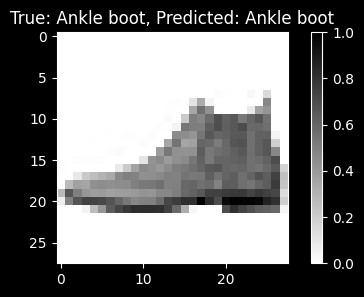

In [25]:
# Get the predicted label for the first test image
predicted_label = np.argmax(predictions[0])

# Get the true label for the first test image
true_label = test_labels[0]

# Display the first test image
plt.figure(figsize=(6,3))
plt.imshow(test_images[0], cmap=plt.cm.binary)

# Set the title to show true vs predicted labels
plt.title(f"True: {class_names[true_label]}, Predicted: {class_names[predicted_label]}")

plt.colorbar()
plt.grid(False)
plt.show()

In [26]:
test_labels[0]

np.uint8(9)

We can make a nice graph to look at the full set of 10 class predictions for the 1st image. To do that, we create two functions, plot_image() and plot_value_array(). The code in the following cell was taken from TensorFlow/Keras tutorial and slightly modified.

In [28]:


def plot_image(i, predictions_array, true_label, img):
  """Plots a single image, its true label, and the predicted label."""
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  color = 'blue' if predicted_label == true_label else 'red'

  # This part of the xlabel seems slightly different from the previous version,
  # showing predicted label name and confidence, and also the true label name.
  # Let's use the format from your image.
  plt.xlabel("{} {:2.0f}% ({})".format(
      class_names[predicted_label],
      100*np.max(predictions_array),
      class_names[true_label]),
      color=color)

def plot_value_array(i, predictions_array, true_label):
  """Plots the prediction probabilities for a single image."""
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  # This part of the bar color definition seems different from the previous version.
  # Let's use the format from your image.
  thisplot = plt.bar(range(10), predictions_array, color=(0.7,0.7,0.7)) #paint a o
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red') #over-paint the predicted (i.e. tall
  thisplot[true_label].set_color('blue') #over-paint the bar for the true labe

Consequently, if our predicted label is correct, we will only see one green (which is also the tallest one) and the rest are gray bars. If, however, our model incorrectly predicted the label, the tallest bar (our prediction) will be in red, the green one is correct (i.e. the true label), and the rest are gray. By the way, if a probability is negligible (very small), the corresponding bar will not be plotted.

So, let's see the plot for the first test image (index=0).

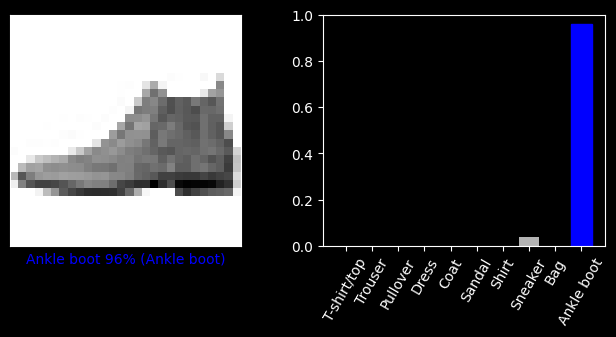

In [31]:
i = 0 #first image

plt.figure(figsize=(8,3))
plt.subplot(1,2,1) # 1 row, 2 columns, 1st panel
plot_image(i, predictions[i], test_labels, test_images) # Call the image plotting function

plt.subplot(1,2,2) # 1 row, 2 columns, 2nd panel
plot_value_array(i, predictions[i], test_labels) # Call the probability bar chart plotting function

plt.xticks(range(10), class_names, rotation=60) # Set x-axis ticks to class names and rotate them

# The original line causing the error:
# plt.yticks([0, 0.2*np.arange(6)])

# Option 1: Set y-ticks at 0, 0.2, 0.4, 0.6, 0.8, 1.0
plt.yticks(np.arange(0, 1.1, 0.2))

# Option 2: Remove y-ticks
# plt.yticks([])

plt.show()

However, as we saw earlier, the model accuracy on the test data is $\approx 85$% (after 5 epochs). Here below we see how our model incorrectly predicted the 13th item in the test data (index=12).

As mentioned above, the red one is our predicted fashion item (Sandal), while the correct one is green (Sneaker).

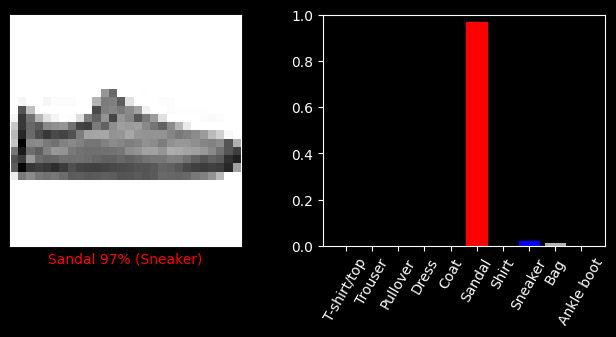

In [32]:
i = 12 #first image

plt.figure(figsize=(8,3))
plt.subplot(1,2,1) # 1 row, 2 columns, 1st panel
plot_image(i, predictions[i], test_labels, test_images) # Call the image plotting function

plt.subplot(1,2,2) # 1 row, 2 columns, 2nd panel
plot_value_array(i, predictions[i], test_labels) # Call the probability bar chart plotting function

plt.xticks(range(10), class_names, rotation=60) # Set x-axis ticks to class names and rotate them

# The original line causing the error in the previous example is still here:
# plt.yticks([0, 0.2*np.arange(6)])

# Remember to use one of the corrected options for plt.yticks from our previous discussion:
# Option 1: Set y-ticks at 0, 0.2, 0.4, 0.6, 0.8, 1.0
plt.yticks(np.arange(0, 1.1, 0.2))

# Option 2: Remove y-ticks
# plt.yticks([])


plt.show()

Now, let's plot 12 selected images with their predictions. Note that the model can be wrong even when very confident (like for the upper-left and upper-right items in the following plot).

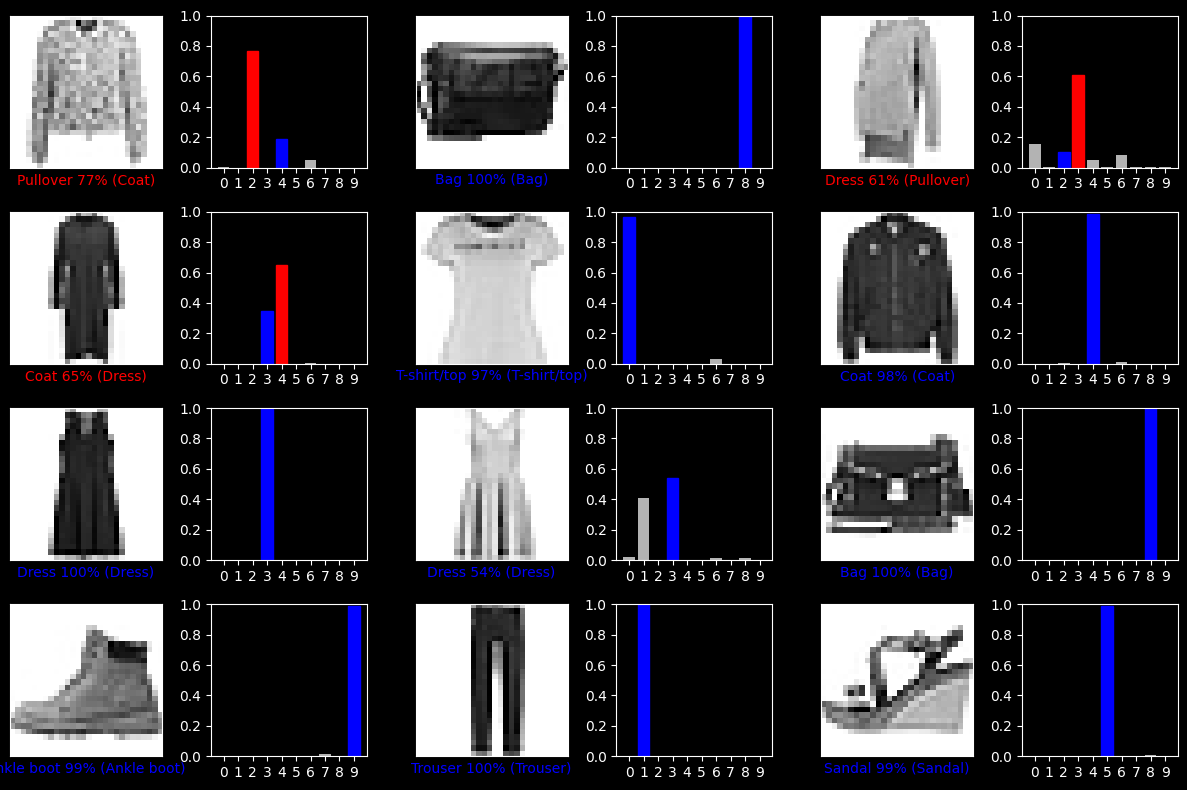

In [33]:
#List of indices of 12 selected images to plot
li = [51, 56, 66, 67, 71, 79, 86, 91, 95, 203, 214, 221]

num_rows = 4 #want to make 4 by 3 subplots
num_cols = 3 #want to make 4 by 3 subplots
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows)) # Adjusted figure size

for i in range(len(li)):
    plt.subplot(num_rows, 2*num_cols, 2*i+1) # Subplot for the image
    # Use the index from the li list to get the specific image and prediction
    plot_image(li[i], predictions[li[i]], test_labels, test_images)

    plt.subplot(num_rows, 2*num_cols, 2*i+2) # Subplot for the prediction probabilities
    # Use the index from the li list to get the specific prediction probabilities
    plot_value_array(li[i], predictions[li[i]], test_labels)

    # The original problematic yticks line is still here:
    # plt.yticks([0, 0.2*np.arange(6)])

    # Remember to use one of the corrected options for plt.yticks from our previous discussion:
    # Option 1: Set y-ticks at 0, 0.2, 0.4, 0.6, 0.8, 1.0
    plt.yticks(np.arange(0, 1.1, 0.2))

    # Option 2: Remove y-ticks
    # plt.yticks([])


plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

## Predict on a Single Image

Instead of predicting for all the test images, we can also use `predict()` method to predict the type of the fashion item for just one image (or any collection of images). But, we would first need a reformatting step.

Using the following code, note that the shape of the `train_images` is 60,000 x 28 x 28 and compare that to the shape of a single (i.e. the first training) image, which is 28 x 28.

Using the following code, note that the shape of the `train_images` is 60,000 x 28 x 28 and compare that to the shape of a single (i.e. the first training) image, which is 28 x 28.

In [35]:
print(train_images.shape)

img = train_images[0]
print(img.shape)

(60000, 28, 28)
(28, 28)


To make our first image usable in the `predict()` function, we reformat it by adding extra dimension (the first dimension, i.e. axis=0)

In [36]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 28, 28)

Now we can apply predict.

In [37]:
probs = mynet.predict(img)

print(probs)
print('\npredicted label:', np.argmax(probs), '; fashion item:', class_names[np.argmax(probs)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[2.5951683e-13 1.7223442e-16 9.1204330e-18 4.9212087e-19 4.9847618e-14
  2.9172592e-05 8.5695331e-15 7.3273969e-04 5.1029504e-11 9.9923813e-01]]

predicted label: 9 ; fashion item: Ankle boot
